In [5]:
#import our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [6]:
#read in our dataframe
cancer = pd.read_csv('dataset/wdbc.csv')
cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
#clean our data
cancer['diagnosis'] = cancer['diagnosis'].replace({
'M' : 'Malignant',
'B': 'Benign'    
})

cancer['diagnosis'].unique()

array(['Malignant', 'Benign'], dtype=object)

In [9]:
#scaling our variables

standardized_cancer = cancer.copy()

columns_to_exclude = ['id','diagnosis']
columns_to_scale = standardized_cancer.columns.difference(columns_to_exclude)

scaler = StandardScaler()
standardized_cancer[columns_to_scale] = scaler.fit_transform(standardized_cancer[columns_to_scale])

standardized_cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,Malignant,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,842517,Malignant,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,84300903,Malignant,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,84348301,Malignant,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,84358402,Malignant,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,Malignant,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,926682,Malignant,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,926954,Malignant,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,927241,Malignant,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [28]:
#set the seed

#np.random.seed(1)

#slit the data

cancer_train, cancer_test = train_test_split(
    standardized_cancer, train_size = 0.75, shuffle = True,
    stratify= standardized_cancer['diagnosis'],random_state=123
)

cancer_train

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
366,9011494,Malignant,1.724735,1.754690,1.718907,1.647051,0.191415,1.185586,0.945398,2.001119,...,1.640261,1.324372,1.570869,1.389484,-0.200268,0.555572,0.470692,1.531701,0.598974,-0.422591
86,86135501,Malignant,0.100174,0.505055,0.093953,-0.019024,-0.136658,-0.092312,0.396746,0.011887,...,-0.012257,0.581805,0.033920,-0.126013,-0.077528,-0.360469,0.300860,0.120195,0.192911,-0.858159
230,881972,Malignant,0.830091,-0.048787,0.882746,0.682900,1.262455,1.001757,1.283127,1.549724,...,0.687682,-0.128194,0.781544,0.542170,1.662757,0.885093,1.101567,2.127061,0.336894,0.369301
467,9113514,Benign,-1.266502,-0.276839,-1.273149,-1.048305,-0.942962,-0.948730,-0.929185,-1.113014,...,-1.060095,-0.172162,-1.076794,-0.879630,0.281926,-0.819126,-0.998357,-1.364398,0.252769,-0.287930
138,868826,Malignant,0.233661,-0.400174,0.201048,0.066014,1.447485,0.495752,0.817337,0.962653,...,0.472316,-0.691634,0.421136,0.159648,0.382749,-0.240875,0.303738,0.793211,0.830317,-0.691358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,899667,Malignant,0.460872,-0.016208,0.623248,0.294964,1.988342,2.502714,2.543646,1.941793,...,0.225888,-0.245442,0.361564,0.061029,0.992068,1.592480,1.991028,1.505816,2.174692,1.166735
326,89524,Benign,-0.004911,-1.491568,-0.079869,-0.109183,-0.232731,-0.971851,-0.893278,-0.556870,...,-0.153073,-1.250188,-0.263939,-0.229730,-0.187118,-0.912002,-1.051226,-0.848216,-1.295447,-0.726824
139,868871,Benign,-0.808671,-1.372888,-0.781338,-0.768161,1.426135,0.175472,-0.532950,-0.024740,...,-0.900641,-1.613330,-0.915355,-0.785054,0.189871,-0.458434,-0.889933,-0.433901,-1.292212,-0.892517
474,911391,Benign,-0.922277,-0.853952,-0.888021,-0.841823,0.308838,0.048497,-0.472686,-0.856596,...,-0.896500,-1.030349,-0.788765,-0.786636,0.036445,0.862192,0.308536,-0.532112,-0.517295,1.332982


In [32]:
cancer_train.info()
cancer_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 257 to 200
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       143 non-null    int64  
 1   diagnosis                143 non-null    object 
 2   radius_mean              143 non-null    float64
 3   texture_mean             143 non-null    float64
 4   perimeter_mean           143 non-null    float64
 5   area_mean                143 non-null    float64
 6   smoothness_mean          143 non-null    float64
 7   compactness_mean         143 non-null    float64
 8   concavity_mean           143 non-null    float64
 9   concave points_mean      143 non-null    float64
 10  symmetry_mean            143 non-null    float64
 11  fractal_dimension_mean   143 non-null    float64
 12  radius_se                143 non-null    float64
 13  texture_se               143 non-null    float64
 14  perimeter_se            

In [33]:
#creating our model
knn = KNeighborsClassifier(n_neighbors=5)

In [34]:
#defining our variables
X = cancer_train[["perimeter_mean","concavity_mean"]]
y = cancer_train['diagnosis']

In [35]:
#fitting our model to the train data

knn.fit(X,y)

KNeighborsClassifier()

In [37]:
cancer_test["predicted"] = knn.predict(cancer_test[["perimeter_mean","concavity_mean"]])

cancer_test[["id","diagnosis","predicted"]]

,id,diagnosis,predicted
257,886776,Malignant,Malignant
382,90250,Benign,Benign
241,883539,Benign,Benign
527,91813702,Benign,Benign
368,9011971,Malignant,Malignant
...,...,...,...
20,8510653,Benign,Benign
247,884626,Benign,Malignant
29,853201,Malignant,Malignant
177,87281702,Malignant,Malignant


In [38]:
#calculate accuracy

knn.score(cancer_test[['perimeter_mean','concavity_mean']], cancer_test['diagnosis'])

0.9230769230769231

In [39]:
#create a confusion matrix

pd.crosstab(
    cancer_test['diagnosis'],
    cancer_test['predicted'],
    rownames= ['Actual'],
    colnames=['Predicted']
)

Predicted,Benign,Malignant
Actual,,
Benign,84,6
Malignant,5,48


In [40]:
precision_score(
    y_true = cancer_test['diagnosis'],
    y_pred = cancer_test['predicted'],
    pos_label = "Malignant"
)

0.8888888888888888

In [41]:
recall_score(
    y_true = cancer_test['diagnosis'],
    y_pred = cancer_test['predicted'],
    pos_label = "Malignant"
)

0.9056603773584906

In [50]:
#reuse the train_test_split function to split our training data into sub-training and validation set

cancer_subtrain, cancer_validation = train_test_split(
    cancer_train, train_size = 0.75,
    stratify= cancer_train["diagnosis"]
)

In [51]:
knn = KNeighborsClassifier(n_neighbors=3)
X = cancer_subtrain[["perimeter_mean","concavity_mean"]]
y = cancer_subtrain[['diagnosis']]
knn.fit(X,y)

/Users/juliagallucci/miniconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [52]:
acc = knn.score(
    cancer_validation[["perimeter_mean","concavity_mean"]],
    cancer_validation["diagnosis"]
)

acc

0.9345794392523364

In [66]:
knn = KNeighborsClassifier(n_neighbors=3)
X = cancer_train[["perimeter_mean","concavity_mean"]]
y = cancer_train["diagnosis"]

returned_dictionary = cross_validate(
    estimator = knn,
    cv = 5,
    X = X,
    y = y
)

cv_5_df = pd.DataFrame(returned_dictionary)
cv_5_df

,fit_time,score_time,test_score
0,0.003875,0.005086,0.906977
1,0.001163,0.004286,0.905882
2,0.001687,0.002418,0.929412
3,0.000994,0.001827,0.894118
4,0.000894,0.001917,0.894118


In [54]:
cv_5_metrics = cv_5_df.agg(["mean","sem"])
cv_5_metrics

,fit_time,score_time,test_score
mean,0.001491,0.002353,0.906101
sem,0.000304,0.000333,0.006448


In [74]:
#create our parameter grid

parameter_grid = {
    "n_neighbors": range(1,385,1)
}
parameter_grid

{'n_neighbors': range(1, 385, 5)}

In [75]:
cancer_tune_grid = GridSearchCV(
    estimator= knn,
    param_grid=parameter_grid,
    cv = 10
)

In [76]:
cancer_tune_grid.fit(
    cancer_train[["perimeter_mean","concavity_mean"]],
    cancer_train["diagnosis"]
)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': range(1, 385, 5)})

In [77]:
accuracy_grid = pd.DataFrame(cancer_tune_grid.cv_results_)
accuracy_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001283,0.000711,0.002088,0.000798,1,{'n_neighbors': 1},1.000000,0.860465,0.953488,0.883721,0.883721,0.930233,0.857143,0.857143,0.880952,0.904762,0.901163,0.044625,32
1,0.000706,0.000051,0.001095,0.000151,6,{'n_neighbors': 6},0.930233,0.906977,0.953488,0.953488,0.976744,0.906977,0.904762,0.857143,0.880952,0.928571,0.919934,0.034188,7
2,0.000684,0.000115,0.001040,0.000114,11,{'n_neighbors': 11},0.953488,0.883721,0.930233,0.930233,0.930233,0.930233,0.904762,0.857143,0.857143,0.904762,0.908195,0.031352,29
3,0.000712,0.000097,0.000977,0.000057,16,{'n_neighbors': 16},0.953488,0.860465,0.953488,0.953488,0.953488,0.906977,0.880952,0.857143,0.857143,0.928571,0.910520,0.040990,26
4,0.000767,0.000234,0.001251,0.000285,21,{'n_neighbors': 21},0.953488,0.883721,0.953488,0.930233,0.953488,0.906977,0.880952,0.857143,0.857143,0.928571,0.910520,0.036819,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.000689,0.000122,0.004320,0.001515,361,{'n_neighbors': 361},0.627907,0.627907,0.627907,0.627907,0.627907,0.627907,0.619048,0.619048,0.619048,0.642857,0.626744,0.006674,59
73,0.000820,0.000166,0.003843,0.000434,366,{'n_neighbors': 366},0.627907,0.627907,0.627907,0.627907,0.627907,0.627907,0.619048,0.619048,0.619048,0.642857,0.626744,0.006674,59
74,0.000720,0.000131,0.003319,0.000587,371,{'n_neighbors': 371},0.627907,0.627907,0.627907,0.627907,0.627907,0.627907,0.619048,0.619048,0.619048,0.642857,0.626744,0.006674,59
75,0.000738,0.000158,0.003741,0.000759,376,{'n_neighbors': 376},0.627907,0.627907,0.627907,0.627907,0.627907,0.627907,0.619048,0.619048,0.619048,0.642857,0.626744,0.006674,59


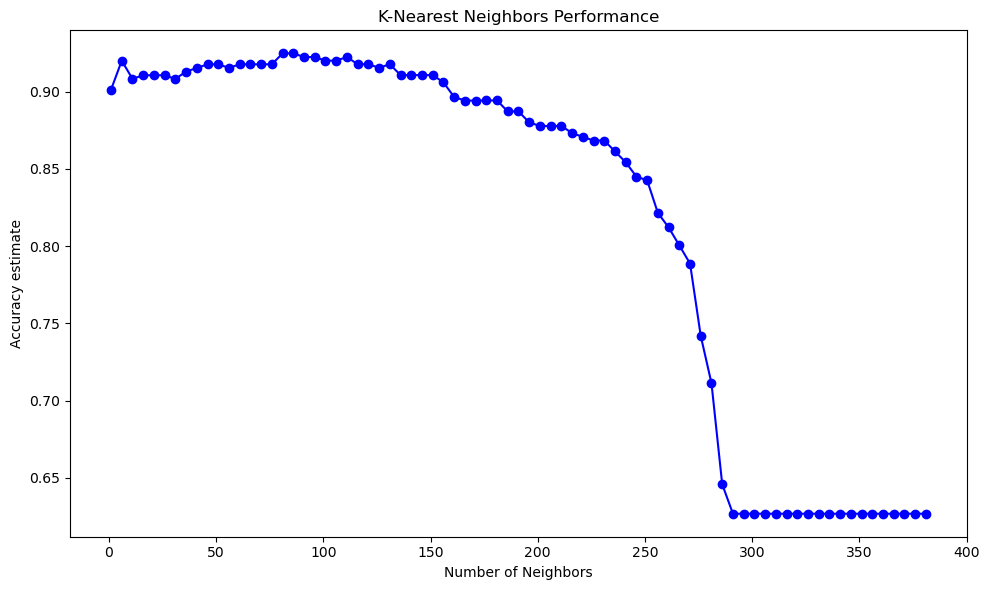

In [78]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot mean test scores with error bars
plt.plot(accuracy_grid['param_n_neighbors'], accuracy_grid['mean_test_score'], '-o', color='blue')

# Add labels and legend
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy estimate')
plt.title('K-Nearest Neighbors Performance')
plt.tight_layout()
plt.show()

In [79]:
#find the best k 
cancer_tune_grid.best_params_

{'n_neighbors': 81}